<a href="https://colab.research.google.com/github/Semy-sudo/CATMOS/blob/master/%EC%A2%85%EB%B6%84%EB%A5%98_%EC%86%A1%EC%98%88%EC%9D%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#구글 드라이브로 부터 파일 가져오기
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
#텐서 버전 확인
!pip show tensorflow


Name: tensorflow
Version: 2.2.0rc4
Summary: TensorFlow is an open source machine learning framework for everyone.
Home-page: https://www.tensorflow.org/
Author: Google Inc.
Author-email: packages@tensorflow.org
License: Apache 2.0
Location: /usr/local/lib/python3.6/dist-packages
Requires: tensorboard, tensorflow-estimator, termcolor, wheel, google-pasta, grpcio, h5py, scipy, astunparse, absl-py, numpy, opt-einsum, protobuf, wrapt, six, gast, keras-preprocessing
Required-by: fancyimpute


In [0]:
!pip install --upgrade tensorflow

     |████████████████████████████████| 516.2MB 30kB/s 
  Found existing installation: tensorflow 2.2.0rc4
    Uninstalling tensorflow-2.2.0rc4:
      Successfully uninstalled tensorflow-2.2.0rc4


In [0]:
!pip install tensorflow==1.2

     |████████████████████████████████| 35.0MB 82kB/s 
     |████████████████████████████████| 245kB 40.4MB/s 
     |████████████████████████████████| 890kB 19.6MB/s 
  Created wheel for markdown: filename=Markdown-2.2.0-cp36-none-any.whl size=136299 sha256=0e620a7718908559fa956bfa0199e64cf039a0553760e112faca525e0232f4c0
  Stored in directory: /root/.cache/pip/wheels/b6/52/17/f0af18e3e0ec6fa60b361ffed15b4c3468f6f3bcdb87fbe079
  Created wheel for html5lib: filename=html5lib-0.9999999-cp36-none-any.whl size=107220 sha256=193549df15aa99544c87a6d4f9d7bcf47f39172a095bdbbfa1ca869db82c0d1a
  Stored in directory: /root/.cache/pip/wheels/50/ae/f9/d2b189788efcf61d1ee0e36045476735c838898eef1cad6e29
Successfully built markdown html5lib
ERROR: tensorboard 2.2.1 has requirement markdown>=2.6.8, but you'll have markdown 2.2.0 which is incompatible.
  Found existing installation: html5lib 1.0.1
    Uninstalling html5lib-1.0.1:
      Successfully uninstalled html5lib-1.0.1
  Found existing installation

In [0]:
!apt-get -qq install -y libfluidsynth1

Selecting previously unselected package libfluidsynth1:amd64.
(Reading database ... 144429 files and directories currently installed.)
Preparing to unpack .../libfluidsynth1_1.1.9-1_amd64.deb ...
Unpacking libfluidsynth1:amd64 (1.1.9-1) ...
Setting up libfluidsynth1:amd64 (1.1.9-1) ...
Processing triggers for libc-bin (2.27-3ubuntu1) ...
/sbin/ldconfig.real: /usr/local/lib/python3.6/dist-packages/ideep4py/lib/libmkldnn.so.0 is not a symbolic link



In [11]:
!pip uninstall tensorflow


Uninstalling tensorflow-1.5.0:
  Would remove:
    /usr/local/bin/freeze_graph
    /usr/local/bin/saved_model_cli
    /usr/local/bin/tensorboard
    /usr/local/bin/toco
    /usr/local/bin/toco_from_protos
    /usr/local/lib/python3.6/dist-packages/external/*
    /usr/local/lib/python3.6/dist-packages/tensorflow-1.5.0.dist-info/*
    /usr/local/lib/python3.6/dist-packages/tensorflow/*
Proceed (y/n)? y
  Successfully uninstalled tensorflow-1.5.0


In [12]:
!pip install tensorflow==1.5

  Using cached https://files.pythonhosted.org/packages/04/79/a37d0b373757b4d283c674a64127bd8864d69f881c639b1ee5953e2d9301/tensorflow-1.5.0-cp36-cp36m-manylinux1_x86_64.whl


In [1]:
import tensorflow as tf
print(tf.__version__)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:493: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:494: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:495: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:496: FutureWarning: Passing (type, 1) or 

1.5.0


In [2]:
#구글 드라이브로 부터 파일 가져오기
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [1]:

from PIL import Image
import os, glob, numpy as np
from sklearn.model_selection import train_test_split



caltech_dir = "/content/drive/My Drive/Colab Notebooks/model/multi_img_data/imgs_others/train"
categories = ["러시안블루", "봄베이", "Persian", "Siberia"]
nb_classes = len(categories)

image_w = 64
image_h = 64

pixels = image_h * image_w * 3

X = []
y = []

for idx, cat in enumerate(categories):
    
    #one-hot 돌리기.
    label = [0 for i in range(nb_classes)]
    label[idx] = 1
    
    #cat = "러시안블루", "봄베이", "Persian", "Siberia" 중 하나
    image_dir = caltech_dir + "/" + cat
    files = glob.glob(image_dir+"/*.jpg")
    print(cat, " 파일 길이 : ", len(files))
    for i, f in enumerate(files):
        img = Image.open(f)
        img = img.convert("RGB")
        img = img.resize((image_w, image_h))
        data = np.asarray(img)

        X.append(data)
        y.append(label)

        if i % 700 == 0:
            print(cat, " : ", f)

X = np.array(X)
y = np.array(y)
#1 0 0 0 이면 러시안블루
#0 1 0 0 이면 봄베이 이런식


X_train, X_test, y_train, y_test = train_test_split(X, y)
xy = (X_train, X_test, y_train, y_test)
#경로에 train test data 를 multi_image_data 로 저장
np.save("/content/drive/My Drive/Colab Notebooks/numpy_data/multi_image_data.npy", xy)

print("ok", len(y))

러시안블루  파일 길이 :  100
러시안블루  :  /content/drive/My Drive/Colab Notebooks/model/multi_img_data/imgs_others/train/러시안블루/러시안블루1.jpg
봄베이  파일 길이 :  100
봄베이  :  /content/drive/My Drive/Colab Notebooks/model/multi_img_data/imgs_others/train/봄베이/001.jpg
Persian  파일 길이 :  100
Persian  :  /content/drive/My Drive/Colab Notebooks/model/multi_img_data/imgs_others/train/Persian/persian1.jpg
Siberia  파일 길이 :  99
Siberia  :  /content/drive/My Drive/Colab Notebooks/model/multi_img_data/imgs_others/train/Siberia/Siberia.jpg
ok 399


In [6]:
pip install keras==2.2.0

     |████████████████████████████████| 307kB 6.0MB/s 
     |████████████████████████████████| 51kB 6.2MB/s 
  Found existing installation: Keras-Applications 1.0.8
    Uninstalling Keras-Applications-1.0.8:
      Successfully uninstalled Keras-Applications-1.0.8
  Found existing installation: Keras-Preprocessing 1.1.0
    Uninstalling Keras-Preprocessing-1.1.0:
      Successfully uninstalled Keras-Preprocessing-1.1.0
  Found existing installation: Keras 2.3.1
    Uninstalling Keras-2.3.1:
      Successfully uninstalled Keras-2.3.1


In [13]:
!pip install numpy==1.16.1
import numpy as np

     |████████████████████████████████| 17.3MB 206kB/s 
ERROR: umap-learn 0.4.2 has requirement numpy>=1.17, but you'll have numpy 1.16.1 which is incompatible.
ERROR: datascience 0.10.6 has requirement folium==0.2.1, but you'll have folium 0.8.3 which is incompatible.
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
  Found existing installation: numpy 1.18.4
    Uninstalling numpy-1.18.4:
      Successfully uninstalled numpy-1.18.4


In [2]:
import os, glob, numpy as np
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from keras.callbacks import EarlyStopping, ModelCheckpoint
import matplotlib.pyplot as plt
import keras.backend.tensorflow_backend as K

import tensorflow as tf
#config = tf.compat.v1.ConfigProto()
config = tf.ConfigProto()
#config = tf.config.experimental

config.gpu_options.allow_growth = True
session = tf.Session(config=config)

X_train, X_test, y_train, y_test = np.load('/content/drive/My Drive/Colab Notebooks/numpy_data/multi_image_data.npy')
print(X_train.shape)
print(X_train.shape[0])

Using TensorFlow backend.


(299, 64, 64, 3)
299


In [0]:
#"러시안블루", "봄베이", "Persian", "Siberia"
categories = ["러시안블루", "봄베이", "Persian", "Siberia"]
nb_classes = len(categories)

#일반화
X_train = X_train.astype(float) / 255
X_test = X_test.astype(float) / 255

In [0]:
with K.tf_ops.device('/device:GPU:0'):
    model = Sequential()
    model.add(Conv2D(32, (3,3), padding="same", input_shape=X_train.shape[1:], activation='relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.25))
    
    model.add(Conv2D(64, (3,3), padding="same", activation='relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.25))
    
    model.add(Flatten())
    model.add(Dense(256, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(nb_classes, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    model_dir = './model'
    
    if not os.path.exists(model_dir):
        os.mkdir(model_dir)
    
    model_path = model_dir + '/multi_img_classification.model'
    checkpoint = ModelCheckpoint(filepath=model_path , monitor='val_loss', verbose=1, save_best_only=True)
    early_stopping = EarlyStopping(monitor='val_loss', patience=6)

In [6]:

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 64, 64, 32)        896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 32, 32, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 16, 16, 64)        0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 16, 16, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 16384)             0         
__________

In [7]:

#데이터셋이 적어서 validation을 그냥 test 데이터로 했습니다. 
#데이터셋이 충분하시면 이렇게 하시지 마시고 validation_split=0.2 이렇게 하셔서 테스트 셋으로 나누시길 권장합니다.
history = model.fit(X_train, y_train, batch_size=32, epochs=50, validation_data=(X_test, y_test), callbacks=[checkpoint, early_stopping])

Train on 299 samples, validate on 100 samples
Epoch 1/50
299/299 [==============================] - 6s 19ms/step - loss: 1.3931 - acc: 0.2007 - val_loss: 1.3842 - val_acc: 0.2500

Epoch 00001: val_loss improved from inf to 1.38421, saving model to ./model/multi_img_classification.model
Epoch 2/50
299/299 [==============================] - 6s 18ms/step - loss: 1.3841 - acc: 0.2341 - val_loss: 1.3829 - val_acc: 0.2300

Epoch 00002: val_loss improved from 1.38421 to 1.38290, saving model to ./model/multi_img_classification.model
Epoch 3/50
299/299 [==============================] - 5s 18ms/step - loss: 1.3717 - acc: 0.2809 - val_loss: 1.3610 - val_acc: 0.2500

Epoch 00003: val_loss improved from 1.38290 to 1.36096, saving model to ./model/multi_img_classification.model
Epoch 4/50
299/299 [==============================] - 5s 18ms/step - loss: 1.3398 - acc: 0.4080 - val_loss: 1.3066 - val_acc: 0.5300

Epoch 00004: val_loss improved from 1.36096 to 1.30656, saving model to ./model/multi_img

In [8]:
print("정확도 : %.4f" % (model.evaluate(X_test, y_test)[1]))

100/100 [==============================] - 1s 5ms/step
정확도 : 0.6800


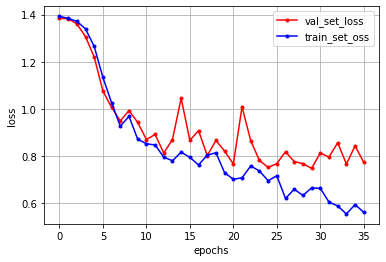

In [9]:

y_vloss = history.history['val_loss']
y_loss = history.history['loss']

x_len = np.arange(len(y_loss))

plt.plot(x_len, y_vloss, marker='.', c='red', label='val_set_loss')
plt.plot(x_len, y_loss, marker='.', c='blue', label='train_set_oss')
plt.legend()
plt.xlabel('epochs')
plt.ylabel('loss')
plt.grid()
plt.show()
#학습에 대한 오차< 검증용 오차

In [10]:

from PIL import Image
import os, glob, numpy as np
from keras.models import load_model

caltech_dir = "/content/drive/My Drive/Colab Notebooks/model/multi_img_data/imgs_others_test"
image_w = 64
image_h = 64

pixels = image_h * image_w * 3

X = []
filenames = []
files = glob.glob(caltech_dir+"/*.*")
for i, f in enumerate(files):
    img = Image.open(f)
    img = img.convert("RGB")
    img = img.resize((image_w, image_h))
    data = np.asarray(img)
    filenames.append(f)
    X.append(data)

X = np.array(X)
model = load_model('./model/multi_img_classification.model')

prediction = model.predict(X)
np.set_printoptions(formatter={'float': lambda x: "{0:0.3f}".format(x)})
cnt = 0

#이 비교는 그냥 파일들이 있으면 해당 파일과 비교. 카테고리와 함께 비교해서 진행하는 것은 _4 파일.
for i in prediction:
    pre_ans = i.argmax()  # 예측 레이블
    print(i)
    print(pre_ans)
    pre_ans_str = ''
    # 순서 "러시안블루", "봄베이", "Persian", "Siberia"
    if pre_ans == 0: pre_ans_str = "러시안블루"
    elif pre_ans == 1: pre_ans_str = "봄베이"
    elif pre_ans == 2: pre_ans_str = "Persian"
    else: pre_ans_str = "Siberia"
    if i[0] >= 0.8 : print("해당 "+filenames[cnt].split("\\")[1]+"이미지는 "+pre_ans_str+"로 추정됩니다.")
    if i[1] >= 0.8: print("해당 "+filenames[cnt].split("\\")[1]+"이미지는 "+pre_ans_str+"으로 추정됩니다.")
    if i[2] >= 0.8: print("해당 "+filenames[cnt].split("\\")[1]+"이미지는 "+pre_ans_str+"로 추정됩니다.")
    if i[3] >= 0.8: print("해당 "+filenames[cnt].split("\\")[1]+"이미지는 "+pre_ans_str+"로 추정됩니다.")
    cnt += 1
    # print(i.argmax()) #얘가 레이블 [1. 0. 0.] 이런식으로 되어 있는 것을 숫자로 바꿔주는 것.
    # 즉 얘랑, 나중에 카테고리 데이터 불러와서 카테고리랑 비교를 해서 같으면 맞는거고, 아니면 틀린거로 취급하면 된다.
    # 이걸 한 것은 _4.py에.

[0.000 0.000 0.000 1.000]
3


IndexError: ignored